# SEIR, birth, death, periodic, waning and introductions
{func}`.SEIR_Birth_Death_Periodic_Waning_Intro`

This model includes relatively more detail than the other pre-defined models provided and may serve as a template for more complex models.

In addition to the processes of births, deaths and seasonal driving, we have included (i) immune waning, which transitions recovered individuals back to susceptible at a rate $w$ and (ii) an external force of infection, which allows individuals to be infected from outside the population (analogous to case importation) at a rate $\epsilon$.

$$\begin{aligned}
\frac{\mathrm{d}S}{\mathrm{d}t} &= - \frac{\beta(t) SI}{N} + w R + \mu N - \epsilon S - \mu S\\
\frac{\mathrm{d}E}{\mathrm{d}t} &= \frac{\beta(t) SI}{N} + \epsilon S - \alpha E - \mu E \\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \alpha E - \gamma I - \mu I \\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I - w R - \mu R \\
\beta(t) &= \beta_0 \left(1+\delta \cos \left(\frac{2 \pi t}{P} \right) \right)
\end{aligned}$$

We solve this set of equations stochastically:

In [8]:
from pygom import common_models
import matplotlib.pyplot as plt
import numpy as np
import math

# Set up PyGOM object

# Parameters

## population
n_pop=1e6

## Seasonal driving
beta0=0.3               # R0 avg = beta0/gamma =1.2, R0 min = (beta0-delta)/gamma=0.8, R0 max = (beta0+delta)/gamma=1.6
delta=0.1
period=365

## Virus
alpha=1/2
gamma=1/4
mu=0.01/365
w=1/(2*365)              # waning rate, immunity lasts ~ 2 years.
epsilon=50/(365*n_pop)   # attack rate:approximately 100*n_sus*365/(365*n_pop)=100*frac_sus
                         # infections from external sources per year (approx 1 per week, just enough
                         # to spark an epidemic when winter arrives)

model = common_models.SEIR_Birth_Death_Periodic_Waning_Intro({'beta0':beta0,
                                                              'delta':delta,
                                                              'period':period,
                                                              'alpha':alpha,
                                                              'gamma':gamma,
                                                              'mu':mu,
                                                              'w':w,
                                                              'ar': epsilon})

# Time range and increments
tmax=365*20                           # maximum time over which to run solver
dt=10                                 # output timestep
n_timestep=math.ceil(tmax/dt)         # number of iterations
t = np.linspace(0, tmax, n_timestep)  # times at which solution will be evaluated

# Initial conditions
x0 = [n_pop, 0, 0, 0, n_pop]

model.initial_values = (x0, t[0])

np.random.seed(1)

n_sim=2
solution, jump, simT = model.solve_stochast(t, n_sim, full_output=True)

Illegal jump, x: [1.000024e+06 2.000000e+00 0.000000e+00 0.000000e+00 1.000026e+06], new x: [ 1.000032e+06 -2.000000e+00  4.000000e+00  0.000000e+00  1.000034e+06]
Illegal jump, x: [1.000069e+06 0.000000e+00 3.000000e+00 5.000000e+00 1.000077e+06], new x: [ 1.000063e+06  5.000000e+00 -1.000000e+00  9.000000e+00  1.000076e+06]
Illegal jump, x: [1.000047e+06 4.000000e+00 3.000000e+00 1.000000e+01 1.000064e+06], new x: [ 1.000072e+06 -1.000000e+00  5.000000e+00  1.400000e+01  1.000090e+06]
Illegal jump, x: [9.999840e+05 6.000000e+00 6.000000e+00 5.300000e+01 1.000049e+06], new x: [ 9.999700e+05 -1.000000e+00  1.600000e+01  5.400000e+01  1.000039e+06]
Illegal jump, x: [7.458530e+05 2.000000e+01 3.100000e+01 2.546380e+05 1.000542e+06], new x: [ 7.491890e+05 -2.200000e+01  4.200000e+01  2.513270e+05  1.000536e+06]
Illegal jump, x: [7.551960e+05 2.200000e+01 5.300000e+01 2.452370e+05 1.000508e+06], new x: [ 7.593740e+05  3.500000e+01 -4.000000e+00  2.410880e+05  1.000493e+06]
Illegal jump, x:

Plotting the infection prevalence over 2 simulations reveals that an initially large epidemic is eventually succeeded by a series of fairly regular annual epidemics of varying sizes.

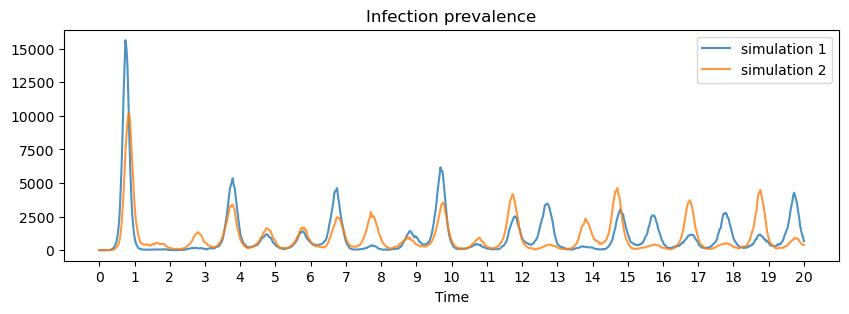

In [14]:
f, ax = plt.subplots(figsize=(10, 3))

ax.set_xlabel("Time")
ax.set_title("Infection prevalence")
ax.plot(t/365, solution[0][:,2], alpha=0.8, label="simulation 1")
ax.plot(t/365, solution[1][:,2], alpha=0.8, label="simulation 2")
plt.xticks(np.arange(0, 21, 1.0))
ax.legend()
plt.show()